# Expectancy Factors EDA

## - About the dataset

A goal of the World Health Organization (WHO) is to ensure that a billion more people are protected from health emergencies, and provided better health and well-being. They provide public data collected from many sources to identify and monitor factors that are important to reach this goal. This set was primarily made using GHO (Global Health Observatory) and UNESCO (United Nations Educational Scientific and Culture Organization) information. The set covers the years 2000-2016 for 183 countries, in a single CSV file. Missing data is left in place, for the user to decide how to deal with it.

## - About the notebook

This notebook consists of data analysis and visualtion of data provided by WHO server. This notebook consists of:

1. Basic Data Debrief
2. Life expectancy analysis
3. Immunization coverage analysis
4. Access to basic drinking water
5. WHO server vs UNESCO server data of life expectancy

## - Packages and libraries used

| S.No | Package/Libraries | Usage |
| --- | --- | --- |
| 1. | Pandas | Basic data analysis and visualization |
| 2. | Numpy | Linear algebra |
| 3. | SQLITE | Lightweight SQL database |
| 4. | Plotly | Graphs and charts |
| 5. | Matplotlib | Graphs and charts |

In [10]:
# Importing libraries

import pandas as pd
import numpy as np
import sqlite3
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import os

In [2]:
# Reading the main data

data = pd.read_csv("data/who_life_exp.csv")

# Creating a SQL connection

conn = sqlite3.connect("who.db")

In [ ]:
# Inserting the csv file into table as SQL table

data.to_sql("main", conn)

In [ ]:
df = pd.read_sql('select * from main;', conn)
df

,index,country,country_code,region,year,life_expect,life_exp60,adult_mortality,infant_mort,age1-4mort,...,che_gdp,une_pop,une_infant,une_life,une_hiv,une_gni,une_poverty,une_edu_spend,une_literacy,une_school
0,0,Angola,AGO,Africa,2000,47.33730,14.73400,383.5583,0.137985,0.025695,...,1.90860,16395.473,122.2,46.522,1.0,2530.0,32.3,2.60753,NaN,NaN
1,1,Angola,AGO,Africa,2001,48.19789,14.95963,372.3876,0.133675,0.024500,...,4.48352,16945.753,118.9,47.059,1.1,2630.0,NaN,NaN,67.40542,NaN
2,2,Angola,AGO,Africa,2002,49.42569,15.20010,354.5147,0.128320,0.023260,...,3.32946,17519.417,115.1,47.702,1.2,3180.0,NaN,NaN,NaN,NaN
3,3,Angola,AGO,Africa,2003,50.50266,15.39144,343.2169,0.122040,0.021925,...,3.54797,18121.479,110.8,48.440,1.3,3260.0,NaN,NaN,NaN,NaN
4,4,Angola,AGO,Africa,2004,51.52863,15.56860,333.8711,0.115700,0.020545,...,3.96720,18758.145,106.2,49.263,1.3,3560.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3106,3106,Lao People's Democratic Republic,LAO,Western Pacific,2012,64.49448,16.57977,209.2666,0.055840,0.004845,...,2.07638,6444.530,47.5,65.267,0.3,4570.0,22.7,1.82147,NaN,NaN
3107,3107,Lao People's Democratic Republic,LAO,Western Pacific,2013,64.79716,16.64219,205.1459,0.055350,0.004600,...,2.39985,6541.304,45.6,65.717,0.3,4980.0,NaN,3.23381,NaN,NaN
3108,3108,Lao People's Democratic Republic,LAO,Western Pacific,2014,65.10757,16.70787,200.8204,0.054585,0.004405,...,2.29846,6639.756,43.7,66.144,0.3,5440.0,NaN,2.93781,NaN,NaN
3109,3109,Lao People's Democratic Republic,LAO,Western Pacific,2015,65.45008,16.77074,196.6613,0.053465,0.004160,...,2.45366,6741.164,42.0,66.546,0.3,5810.0,NaN,NaN,84.66104,NaN


In [ ]:
df.describe()

,index,year,life_expect,life_exp60,adult_mortality,infant_mort,age1-4mort,alcohol,bmi,age5-19thinness,...,che_gdp,une_pop,une_infant,une_life,une_hiv,une_gni,une_poverty,une_edu_spend,une_literacy,une_school
count,3111.00000,3111.000000,3111.000000,3111.000000,3111.000000,3111.000000,3111.000000,3061.000000,3077.000000,3077.000000,...,2994.000000,3.074000e+03,3111.000000,3111.000000,2370.000000,2994.000000,913.000000,1825.00000,571.000000,805.000000
mean,1555.00000,2008.000000,69.146384,18.912060,193.527786,0.032496,0.003489,4.834781,25.052714,5.312447,...,6.110353,3.707550e+04,30.488428,68.957352,2.038397,14964.832999,10.845893,4.53293,81.984472,9.712214
std,898.21267,4.899767,9.129761,2.885412,114.007447,0.030361,0.005146,3.998741,2.193445,4.652408,...,2.505267,1.378377e+05,27.756930,9.359194,4.593804,17495.137508,17.168798,1.75428,19.665588,2.854723
min,0.00000,2000.000000,36.227360,10.728000,49.201850,0.001470,0.000065,0.000000,19.800000,0.100000,...,1.025160,7.601600e+01,1.600000,39.441000,0.100000,420.000000,0.100000,0.78744,14.376040,0.559340
25%,777.50000,2004.000000,63.200095,16.619485,108.269750,0.008255,0.000355,1.198030,23.300000,1.800000,...,4.238798,2.195105e+03,8.000000,62.844500,0.100000,2970.000000,0.600000,3.26283,72.701130,7.735940
50%,1555.00000,2008.000000,71.597200,18.508260,164.822200,0.019995,0.000895,3.993560,25.500000,3.800000,...,5.758030,8.544297e+03,19.500000,71.409000,0.400000,8340.000000,3.100000,4.42541,90.953740,10.270400
75%,2332.50000,2012.000000,75.537030,21.099175,250.832300,0.051720,0.004877,7.723420,26.500000,7.800000,...,7.850327,2.509552e+04,48.050000,75.570645,1.500000,20482.500000,12.400000,5.49498,95.786975,12.070610
max,3110.00000,2016.000000,84.166160,26.394020,696.874200,0.164515,0.039095,20.182460,32.200000,28.100000,...,20.413410,1.414049e+06,142.400000,83.984880,28.200000,122670.000000,94.100000,14.05908,99.998190,14.378800


## Date debrief

From the above **description**, we can conlude the following points:

| S.No | Factor | Value |
| --- | --- | --- |
| 1. | Average life expectancy at birth | 69.146384	Years |
| 2. | Minimum life expectancy at birth | 18.912060	Years |
| 3. | Maximum life expectancy at birth | 84.166160	Years |
| 4. | Average infant mortality rate | 0.032496 |
| 5. | Average alcohol consumption in litres | 4.834781 L |
| 6. | Average BMI | 25.052714 |

## LIFE EXPECTANCY ANALYSIS

In [ ]:
# Life expectancy at birth of all countries in Africa (2000-2016)

growth = pd.read_sql('select country as "Country", life_expect as "Life expectancy at birth", year as "Year" from main group by "Country", "Year" order by "Year";', conn)
px.line(growth, x="Year", y="Life expectancy at birth", line_group="Country", hover_name="Country", color="Country", title="Life expectancy at birth of all countries in Africa (2000-2016)")

## Sudden drop in life expectance of Haiti in 2010

A sudden drop in life expectancy of **Haiti** can be observed in the year 2010. This is caused due to the devastating **2010 Haiti Earthquake**. Some details about them are below:

1. **Location:** Haiti
2. **Year:** 2010
3. **Magnitude:** 7.0M
4. **More details:** [***Click here to know more***](https://en.wikipedia.org/wiki/2010_Haiti_earthquake)

In [ ]:
# Life expectancy at 60 vs alcohol consumption

alc = pd.read_sql('select country as "Country", avg("life_exp60") as "Life Expectancy at 60", avg(alcohol) as "Alcohol" from main group by "Country";', conn)
px.scatter(alc, x="Country", y="Life Expectancy at 60", title="Life expectancy at 60 vs alcohol consumption", color="Alcohol", size="Life Expectancy at 60")

## IMMUNIZATION COVERAGE ANALYSIS

Finding the rate of immunization against various disease with time.

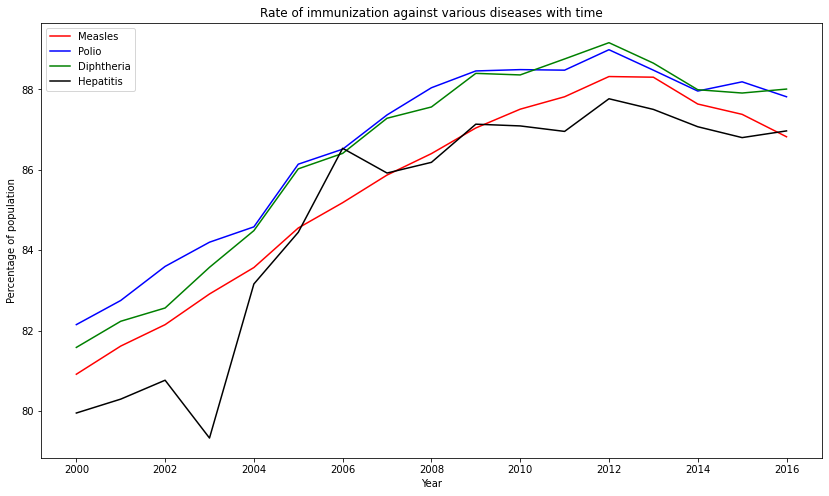

In [ ]:
# Finding values using SQL query

imm = pd.read_sql('select year as "Year", avg(measles) as "Measles", avg(polio) as "Polio", avg(diphtheria) as Diphtheria, avg(hepatitis) as "Hepatitis" from main group by "Year";', conn)

# Plotting chart

x = imm["Year"]
y1 = imm["Measles"]
y2 = imm["Polio"]
y3 = imm["Diphtheria"]
y4 = imm["Hepatitis"]

plt.figure(figsize=[14,8])
plt.plot(x, y1, color="Red", label="Measles")
plt.plot(x, y2, color="Blue", label="Polio")
plt.plot(x, y3, color="Green", label="Diphtheria")
plt.plot(x, y4, color="black", label="Hepatitis")
plt.xlabel("Year")
plt.ylabel("Percentage of population")
plt.title("Rate of immunization against various diseases with time")
plt.legend()
plt.show()

## ACCESS TO BASIC DRINKING WATER

Visualizing the increase/decrease in the population that has access to basic drinking water with time under the following parameters:
1. First, for the whole world.
2. Second, for every region.

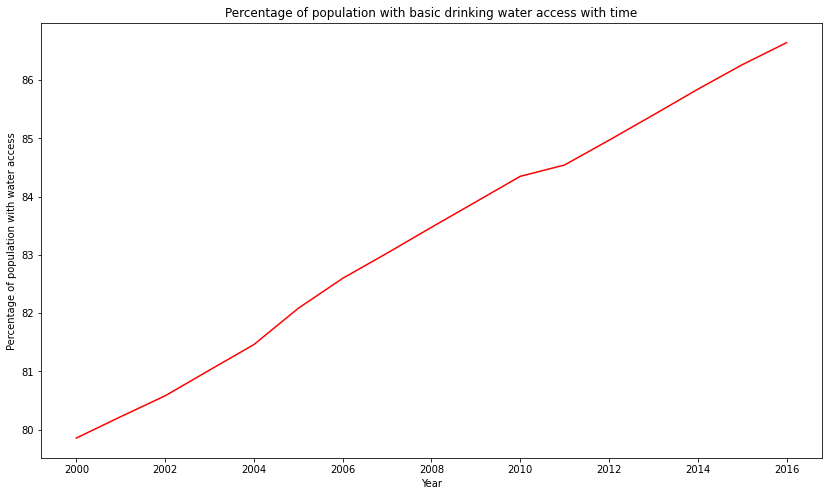

In [ ]:
# Finding for whole continent

wa_world = pd.read_sql('select year as "Year", avg("basic_water") as "Population with water access" from main group by "Year" order by "Year";', conn)

# Plotting the graph

x = wa_world["Year"]
y = wa_world["Population with water access"]
plt.figure(figsize=[14,8])
plt.plot(x, y, color="Red")
plt.xlabel("Year")
plt.ylabel("Percentage of population with water access")
plt.title("Percentage of population with basic drinking water access with time")
plt.show()

## BASIC DRINKING WATER FACILTY

In [ ]:
# Finding for each country individually

wa_region = pd.read_sql('select region as "Region", year as "Year", avg("basic_water") as "Population with water access" from main group by "Region", "Year" order by "Year";', conn)

# Plotting the graph

px.line(wa_region, x="Year", y="Population with water access", line_group="Region", color="Region", title="Percentage of population with basic drinking water access with time (each country)")

## WHO VS UNESCO SERVER DATA FOR LIFE EXPECTANCY

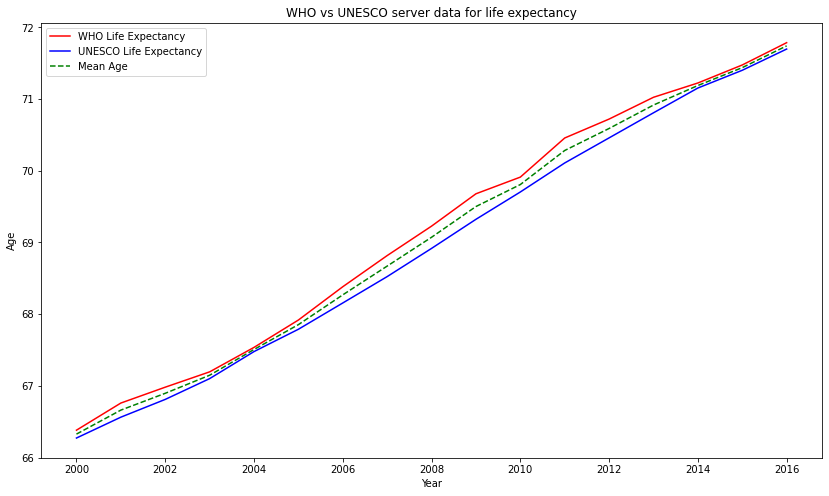

In [ ]:
who_unesco = pd.read_sql('select year as "Year", avg("life_expect") as "WHO Life Expectancy", avg("une_life") as "UNESCO Life Expectancy" from main group by "Year";', conn)

# Plotting the graph

x = who_unesco["Year"]
y1 = who_unesco["WHO Life Expectancy"]
y2 = who_unesco["UNESCO Life Expectancy"]
y_avg = (y1+y2)/2

plt.figure(figsize=[14,8])
plt.plot(x, y1, color="Red", label="WHO Life Expectancy")
plt.plot(x, y2, color="Blue", label="UNESCO Life Expectancy")
plt.plot(x, y_avg, color="green", ls="--", label="Mean Age")
plt.xlabel("Year")
plt.ylabel("Age")
plt.title("WHO vs UNESCO server data for life expectancy")
plt.legend()
plt.show()

In [9]:
# Closing the connection

conn.close()